# Library and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import randint

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [5]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/finaltest/ex1.csv')

In [8]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


# Data cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [10]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

In [11]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

comments                     86.973789
state                        40.905481
work_interfere               20.969023
self_employed                 1.429706
seek_help                     0.000000
obs_consequence               0.000000
mental_vs_physical            0.000000
phys_health_interview         0.000000
mental_health_interview       0.000000
supervisor                    0.000000
coworkers                     0.000000
phys_health_consequence       0.000000
mental_health_consequence     0.000000
leave                         0.000000
anonymity                     0.000000
Timestamp                     0.000000
wellness_program              0.000000
Age                           0.000000
benefits                      0.000000
tech_company                  0.000000
remote_work                   0.000000
no_employees                  0.000000
treatment                     0.000000
family_history                0.000000
Country                       0.000000
Gender                   

In [12]:
df.columns = df.columns.str.lower()

In [13]:
df['country'].nunique()

48

In [14]:
df.groupby(['country'])['state'].value_counts()

country        state
Bahamas, The   IL         1
Bulgaria       UT         1
Israel         MD         1
Latvia         NY         1
United States  CA       138
               WA        70
               NY        56
               TN        45
               TX        44
               OH        30
               OR        29
               PA        29
               IL        28
               IN        27
               MI        22
               MN        21
               MA        20
               FL        15
               NC        14
               VA        14
               GA        12
               MO        12
               WI        12
               UT        10
               CO         9
               AL         8
               AZ         7
               MD         7
               NJ         6
               OK         6
               KY         5
               SC         5
               CT         4
               DC         4
               IA         4

~87% comments là null

5/48 country có state value

-> drop 2 cột này

Chúng ta sẽ tìm hiểu thêm về 2 cột work_interfere và self_employed

In [15]:
df.drop(columns=['state','comments',"timestamp"], inplace=True)

In [16]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [17]:
df['self_employed'].value_counts(normalize=True)

No     0.882353
Yes    0.117647
Name: self_employed, dtype: float64

In [18]:
#Chủ yếu là No nên chuyển giá trị null thành no
df['self_employed'].fillna(value=df['self_employed'].value_counts().idxmax(), inplace=True)

In [19]:
print(df['self_employed'])

0       No
1       No
2       No
3       No
4       No
        ..
1254    No
1255    No
1256    No
1257    No
1258    No
Name: self_employed, Length: 1259, dtype: object


In [20]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [21]:
df['work_interfere'].value_counts(normalize=True)

Sometimes    0.467337
Never        0.214070
Rarely       0.173869
Often        0.144724
Name: work_interfere, dtype: float64

In [22]:
df['work_interfere'].fillna(value="Dont'know", inplace=True)

In [23]:
df.describe(include='all')

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259,1259,1259,1259,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,48,2,2,2,5,6,2,2,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,United States,No,No,Yes,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,615,751,1113,767,637,465,290,883,1031,...,819,563,490,925,774,516,1008,557,576,1075
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Cột age có giá trị âm và số quá lớn nên phải check lại
df['age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [25]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [26]:
df.loc[df.age<0,'age']=10
df.loc[df.age>100,'age']=80

In [27]:
df['age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 10, 43, 56, 60, 54, 80,
       55, 48, 20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [28]:
df['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [29]:
df['gender'].value_counts()

Male      991
Female    247
Other      21
Name: gender, dtype: int64

# Encoding data


In [30]:
for column in df:
  LE = preprocessing.LabelEncoder()
  LE.fit(df[column])
  LE_name_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
  df[column] = LE.transform(df[column])
  print(column, LE_name_mapping)


age {5: 0, 8: 1, 10: 2, 11: 3, 18: 4, 19: 5, 20: 6, 21: 7, 22: 8, 23: 9, 24: 10, 25: 11, 26: 12, 27: 13, 28: 14, 29: 15, 30: 16, 31: 17, 32: 18, 33: 19, 34: 20, 35: 21, 36: 22, 37: 23, 38: 24, 39: 25, 40: 26, 41: 27, 42: 28, 43: 29, 44: 30, 45: 31, 46: 32, 47: 33, 48: 34, 49: 35, 50: 36, 51: 37, 53: 38, 54: 39, 55: 40, 56: 41, 57: 42, 58: 43, 60: 44, 61: 45, 62: 46, 65: 47, 72: 48, 80: 49}
gender {'Female': 0, 'Male': 1, 'Other': 2}
country {'Australia': 0, 'Austria': 1, 'Bahamas, The': 2, 'Belgium': 3, 'Bosnia and Herzegovina': 4, 'Brazil': 5, 'Bulgaria': 6, 'Canada': 7, 'China': 8, 'Colombia': 9, 'Costa Rica': 10, 'Croatia': 11, 'Czech Republic': 12, 'Denmark': 13, 'Finland': 14, 'France': 15, 'Georgia': 16, 'Germany': 17, 'Greece': 18, 'Hungary': 19, 'India': 20, 'Ireland': 21, 'Israel': 22, 'Italy': 23, 'Japan': 24, 'Latvia': 25, 'Mexico': 26, 'Moldova': 27, 'Netherlands': 28, 'New Zealand': 29, 'Nigeria': 30, 'Norway': 31, 'Philippines': 32, 'Poland': 33, 'Portugal': 34, 'Romania'

# Covariance matrix

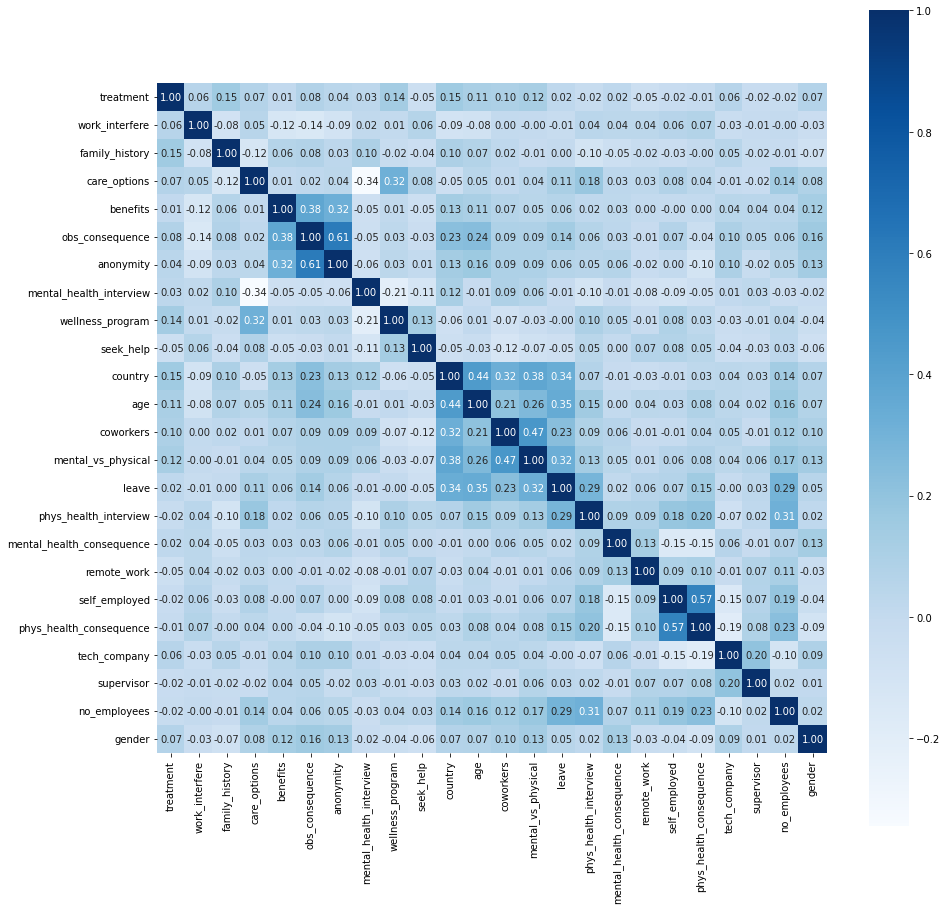

In [48]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(15,15))
k = df.shape[1]
cols = corr_matrix.nlargest(k, 'treatment')['treatment'].index
sns.heatmap(corr_matrix, vmax=1, cbar=True, cmap='Blues', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

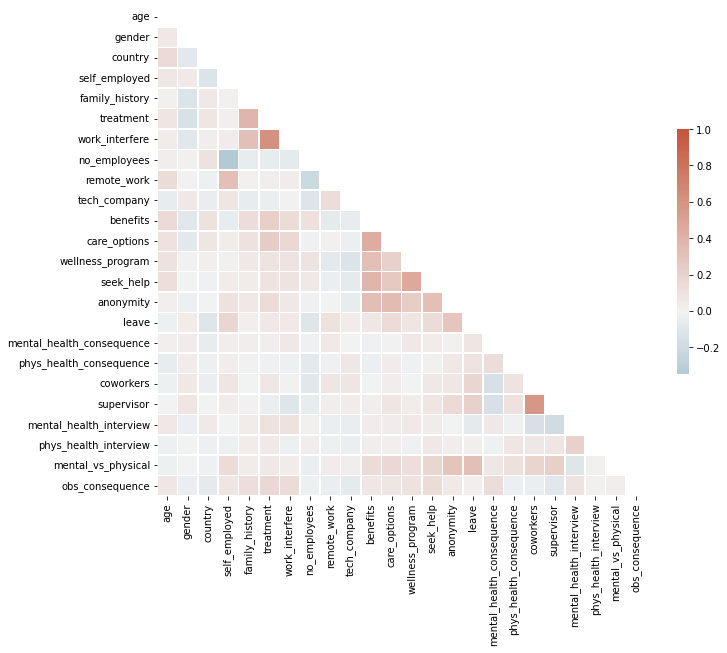

In [50]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Some charts to see data relationship

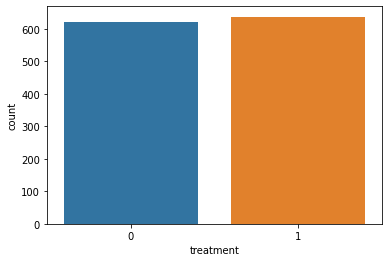

In [52]:
sns.countplot(x='treatment', data=df)
plt.show()

We need focus on this variable

Half of people need treatment

In [56]:
px.histogram(df, x='gender', color='treatment', barmode='group')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



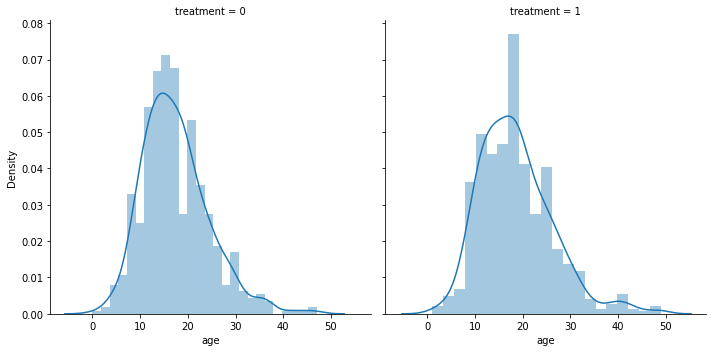

In [57]:
g = sns.FacetGrid(df, col='treatment', size=5)
g = g.map(sns.distplot, "age")

In [58]:
px.histogram(df, x='family_history', color='treatment', barmode='group')

In [59]:
px.histogram(df, x = 'work_interfere',color='treatment',barmode='group')

Above 75% of those who sometimes experience interferance at work needed treatment

A small group still want to have treatment though not having any work interferance



In [61]:
px.histogram(df, x = 'remote_work',color='treatment',barmode='group')

Almost 50% of people in both categories seek treatment

# Scaling and Fitting

In [62]:
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])
df

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.469388,0,45,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,0.612245,1,45,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.367347,1,7,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,0.346939,1,44,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,0.346939,1,45,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.244898,1,44,0,0,1,0,2,0,1,...,0,2,1,1,1,1,1,1,0,0
1255,0.367347,1,45,0,1,1,2,2,1,1,...,2,1,1,1,1,2,1,1,2,0
1256,0.408163,1,45,0,1,1,4,5,0,1,...,0,1,2,2,0,0,1,1,1,0
1257,0.653061,0,45,0,0,0,0,1,1,1,...,0,0,2,1,0,0,1,1,1,0


In [63]:
# Define X and y
X = df.drop(columns=['treatment'])
y = df['treatment']

In [64]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
# Create dictionaries for final graph
methodDict = {}
rmseDict = {}

# Tuning

In [66]:
# Tuning with RandomizedSearchCV
def tuningRandomizedSearchCV(model, param_dist):
  rand_search = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
  rand_result = rand_search.fit(X,y)

  print('Randomized Best Score: ', rand_result.best_score_)
  print('Randomized Best Param: ', rand_result.best_params_)


In [111]:
# Tuning with GridSearchCV

# Grid logistics regression
grid_log = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2', 'l1'],
    'C' :[100, 10, 1.0, 0.1, 0.01]}

# Grid KNN
grid_knn = {
    'leaf_size' : list(range(1,20)),
    'p':[1,2],
    'n_neighbors': list(range(1,20)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

# Grid Random Forest
forest_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy' ],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'n_estimators': [20, 40, 50, 60, 80, 100, 200]}

# Grid Decision Tree
dtree_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7]}

# Define grid search
def gridSearch(model, param_grid):
  grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=5, scoring='recall', error_score=0)
  grid_result = grid_search.fit(X,y)

  print('Grid Best Score: ', grid_result.best_score_)
  print('Grid Best Param: ', grid_result.best_params_)

  return grid_result.best_params_

# Evaluating models

In [112]:
def evaluation_model(model, y_test, y_pred, plot=False):
  #Classification accuracy
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
  print('Error: ', 1 - metrics.accuracy_score(y_test, y_pred))

  #Confusion Matrix
  conf = metrics.confusion_matrix(y_test, y_pred)
  TP = conf[1,1]
  TN = conf[0,0]
  FP = conf[0,1]
  FN = conf[1,0]
  sns.heatmap(conf, annot=True, fmt="d", cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  #AUC Score 
  print('AUC Score: ', metrics.roc_auc_score(y_test, y_pred))

  # ROC Curve
  y_probabilities = model.predict_proba(X_test)[:,1]
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)
  plt.figure(figsize=(10,6))
  plt.title('ROC Curve for treatment classification')
  plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probabilities))
  plt.plot([0,1], ls='--', linewidth=5)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

  return accuracy
 

# Logistic Regression

In [113]:
def Logistic_Regression():
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  accuracy_score = evaluation_model(logreg, y_test, y_pred, True)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy:  0.7976190476190477
Error:  0.20238095238095233


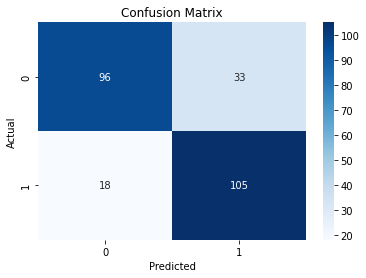

AUC Score:  0.7989222915484968


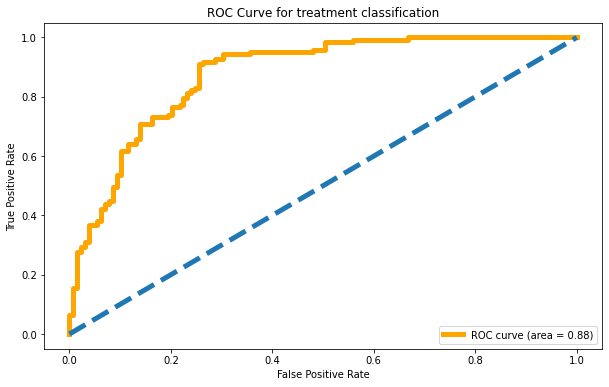

In [114]:
Logistic_Regression()

# KNN Classifier

In [115]:
def Knn():
  #Calculating the best parameters
  knn = KNeighborsClassifier()
  best_grid = gridSearch(knn, grid_knn)
  knn = KNeighborsClassifier(n_neighbors = best_grid['n_neighbors'], weights = best_grid['weights'], metric = best_grid['metric'], leaf_size = best_grid['leaf_size'], p = best_grid['p'] )
  
  #Train model on training set
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  accuracy_score = evaluation_model(knn, y_test, y_pred, True)

  methodDict['KNN'] = accuracy_score * 100

Grid Best Score:  0.8288262795275589
Grid Best Param:  {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
Accuracy:  0.7896825396825397
Error:  0.21031746031746035


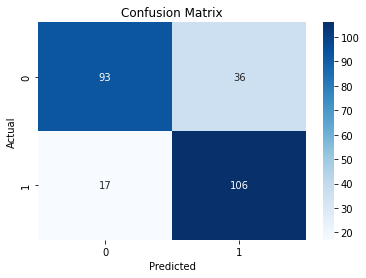

AUC Score:  0.7913594252221592


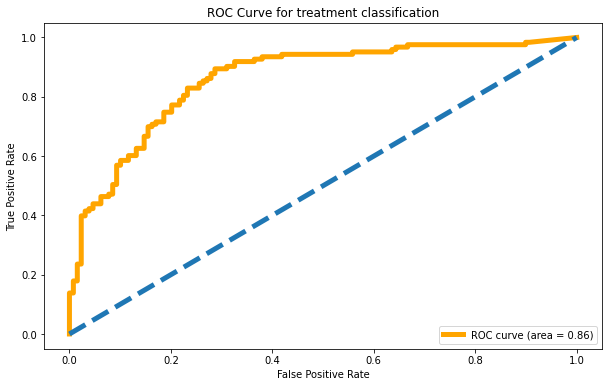

In [116]:
Knn()

# Decision Tree Classifier

In [117]:
def Decision_Tree():
  #Calculating the best parameters
  tree = DecisionTreeClassifier()
  best_grid = gridSearch(tree, dtree_grid)
  tree = DecisionTreeClassifier(class_weight = best_grid['class_weight'], criterion = best_grid['criterion'], max_depth = best_grid['max_depth'] )
  
  #Train model on training set
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)

  accuracy_score = evaluation_model(tree, y_test, y_pred, True)

  methodDict['Decision Tree'] = accuracy_score * 100

Grid Best Score:  0.9466412401574804
Grid Best Param:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2}
Accuracy:  0.8055555555555556
Error:  0.19444444444444442


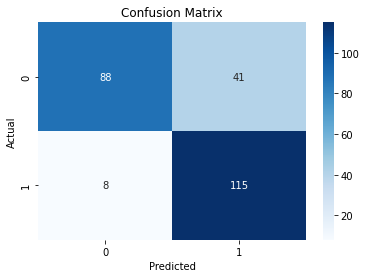

AUC Score:  0.8085649461145774


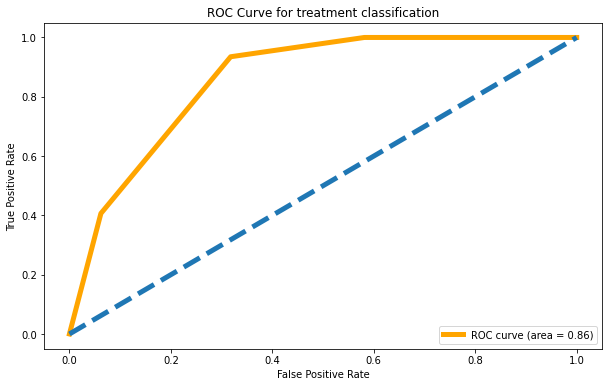

In [118]:
Decision_Tree()

# Random Forests

In [122]:
def Random_Forest():
  #Calculating the best parameters
  forest = RandomForestClassifier()
  best_grid = gridSearch(forest, forest_grid)
  forest = RandomForestClassifier(class_weight = best_grid['class_weight'], criterion = best_grid['criterion'], max_depth = best_grid['max_depth'],n_estimators = best_grid['n_estimators'] )
  
  #Train model on training set
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)

  accuracy_score = evaluation_model(forest, y_test, y_pred, True)

  methodDict['Decision Tree'] = accuracy_score * 100

Grid Best Score:  0.9122170275590552
Grid Best Param:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 20}
Accuracy:  0.8055555555555556
Error:  0.19444444444444442


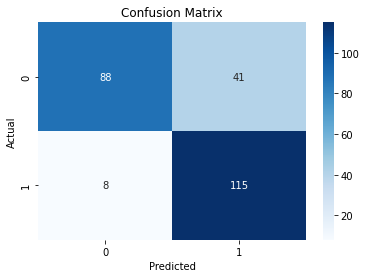

AUC Score:  0.8085649461145774


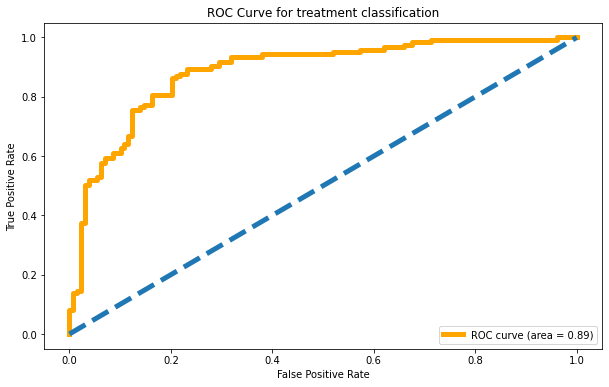

In [123]:
Random_Forest()

# Bagging

In [124]:
def bagging():
  bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
  
  bag.fit(X_train, y_train)
  y_pred = bag.predict(X_test)

  accuracy_score = evaluation_model(bag, y_test, y_pred, True)

  methodDict['Bagging'] = accuracy_score * 100

Accuracy:  0.7976190476190477
Error:  0.20238095238095233


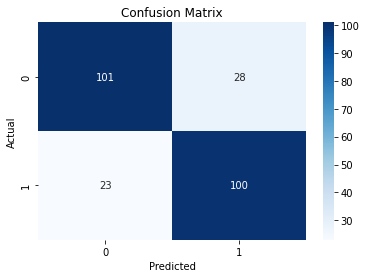

AUC Score:  0.7979769332577048


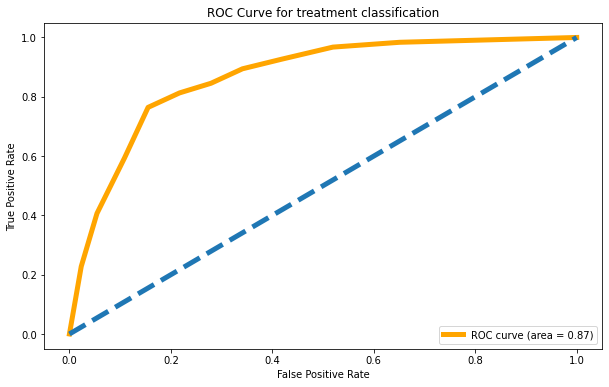

In [125]:
bagging()

# Boosting

In [126]:
def boosting():
  boost = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=1), n_estimators=500)

  boost.fit(X_train, y_train)

  y_pred = boost.predict(X_test)

  accuracy_score = evaluation_model(boost, y_test, y_pred, True)

  methodDict['Boosting'] = accuracy_score * 100

Accuracy:  0.8174603174603174
Error:  0.18253968253968256


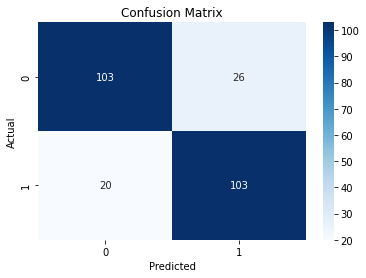

AUC Score:  0.8179239931934204


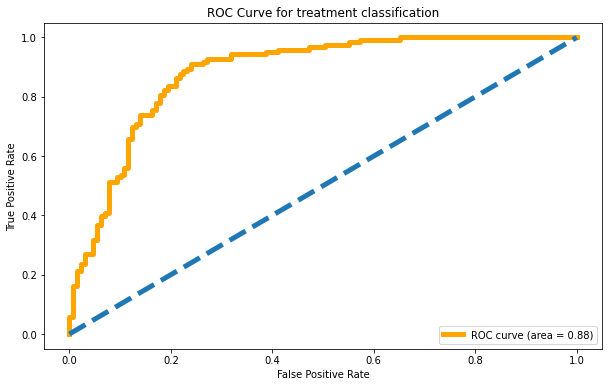

In [127]:
boosting()

# Succes medthod plot 

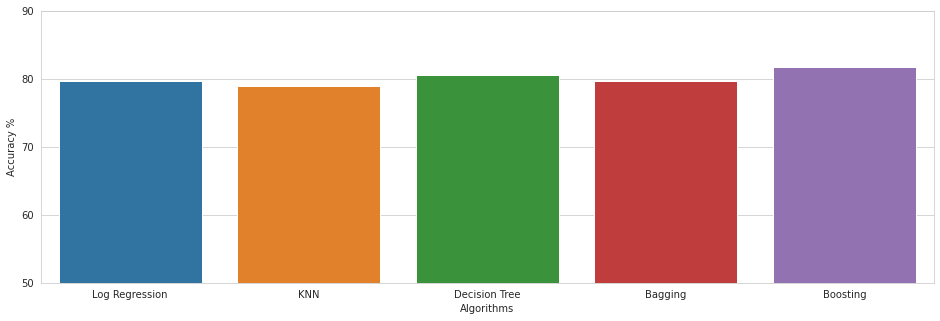

In [130]:

plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylim([50.0, 90.0])
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(methodDict.keys()), y=list(methodDict.values()))
plt.show()

# Creating predictions on test set

In [131]:
# Generate predictions
clf = AdaBoostClassifier()
clf.fit(X,y)
dfTestPredictions = clf.predict(X_test)

In [135]:
result = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
result.head()


,Index,Treatment
0,76,0
1,1026,0
2,43,1
3,666,0
4,529,1


In [136]:
results.to_csv('results.csv', index=False)